## House Price Prediction

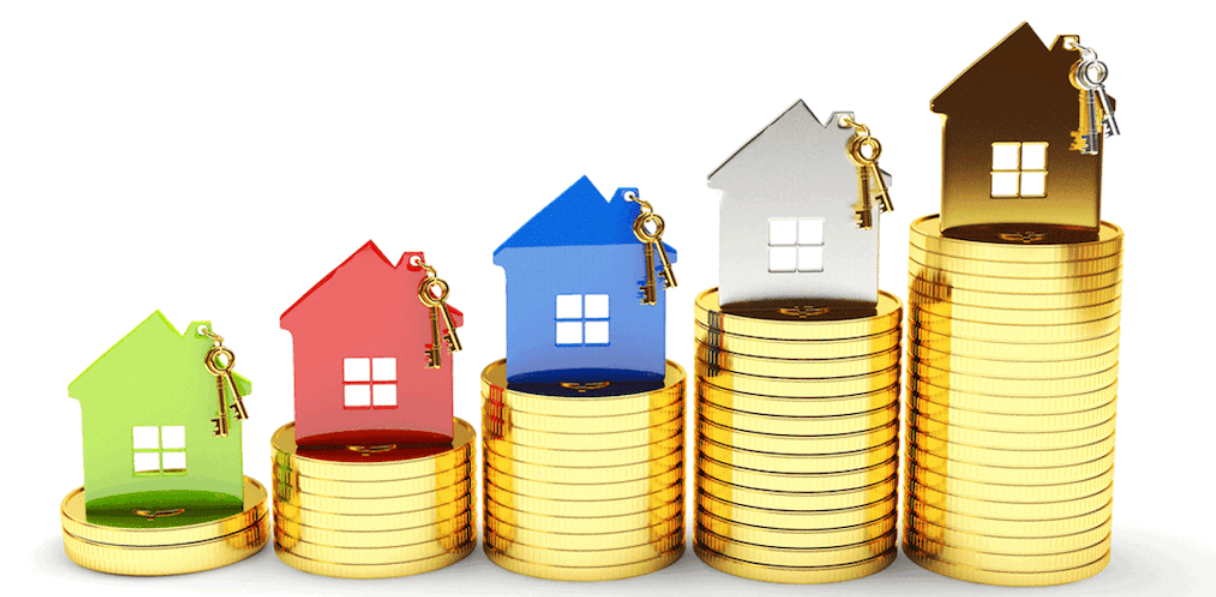

### Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [2]:
df = pd.read_csv('C:\\Users\\Lenovo\\Downloads\\USA_Housing(1).csv')

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


##### Shape

In [4]:
df.shape

(5000, 7)

##### size

In [5]:
df.size

35000

#### Info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4990 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     4995 non-null   float64
 3   Avg. Area Number of Bedrooms  4994 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


##### Insights : From Info we get to know we have 5000 records and 7 variables with label variable.
#####            and we have 3 features having missing data 
#####            (Avg. Area Income,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms) and all features
#####             are in float data type except address and our target variable is price

### Describe : (It gives 5T Summary)

In [7]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,4990.000000,5000.000000,4995.000000,4994.000000,5000.000000,5.000000e+03
mean,68584.719991,5.977222,6.987693,3.981874,36163.516039,1.232073e+06
std,10651.192423,0.991456,1.005938,1.234497,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61481.465105,5.322283,6.299156,3.140000,29403.928700,9.975771e+05
50%,68797.671885,5.970429,7.002940,4.050000,36199.406690,1.232669e+06
75%,75779.145465,6.650808,7.665622,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


##### Insights : From describe we get know , there data is not exactly normal distribution but it is  close to normal distribution because there is no such large diffrence between mean and median

##### Skewness

In [8]:
df.skew()

Avg. Area Income               -0.030046
Avg. Area House Age            -0.007214
Avg. Area Number of Rooms      -0.041172
Avg. Area Number of Bedrooms    0.375705
Area Population                 0.050650
Price                          -0.002718
dtype: float64

##### Insights : Data is little skewed towards left means it is left skwed data

#### Distribution plot : To check distrubtion whether data is in normal dietibution or not

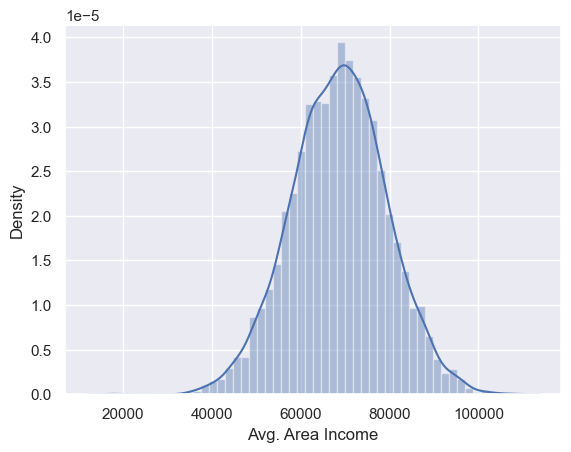

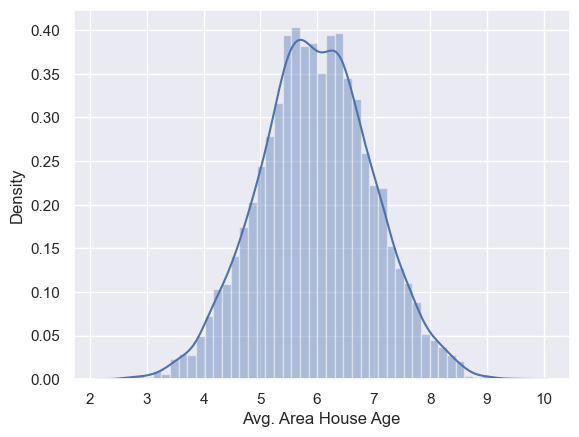

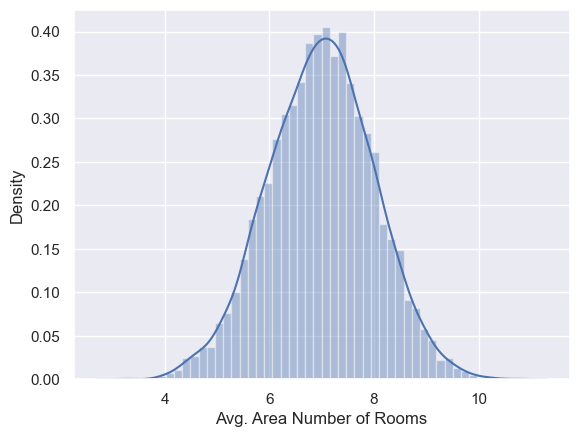

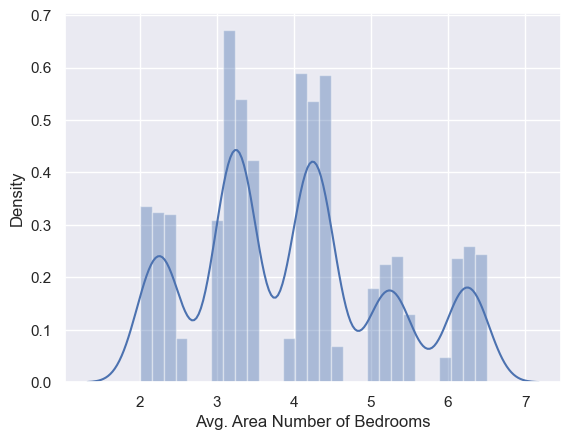

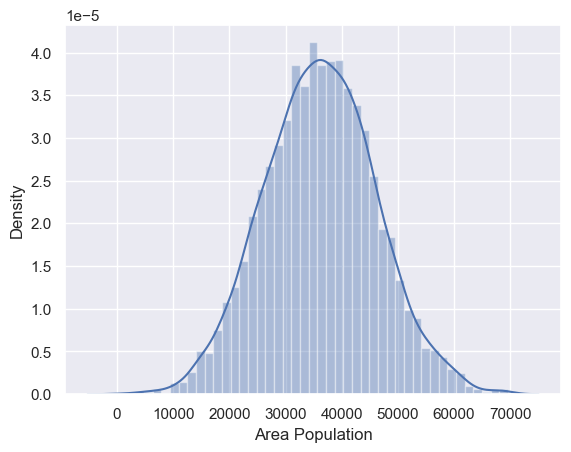

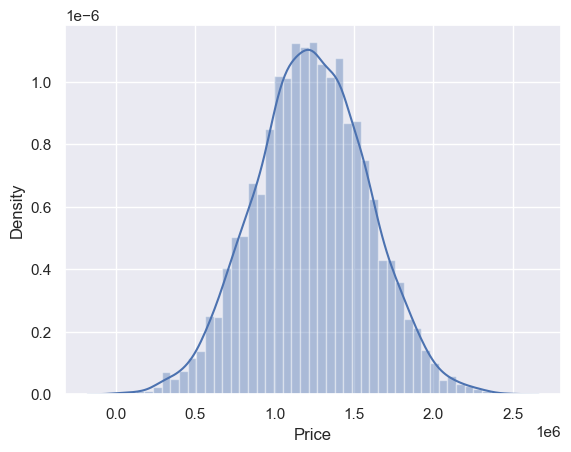

In [9]:
def distplots(col):
    
    sns.distplot(df[col])
    plt.show()
    
for i in list(df.select_dtypes(exclude = 'object')[:]):
    distplots(i)

#### Check the unique values

In [10]:
for i in (df.columns):
    
    print()
    print()
    
    print('*' * 41 , i , '*' * 42)
        
    print()
    print()
        
    values = list(set(df[i].values.tolist()))
        
    print(values)



***************************************** Avg. Area Income ******************************************


[65543.33854, 65550.80328, 65554.84252, 65561.45584, 65566.35691, 65567.85918, 65573.46111, 65579.37802, 65580.05597, 65594.06739, 65606.35861, 65608.60771, 65614.78487, 65627.05111, 65629.88097, 65632.92598, 65641.80717, 65643.86248, 65659.58698, 65669.98453, 65672.20442, 65673.75136, 65674.59699, 65687.10668, 65692.6182, 65694.05127, 65697.82067, 98468.25364, 65706.75564, 65718.30197, 65729.22233, 65736.34642, 65739.68602, 65741.39764, 65745.73181, 65801.23308, 65803.60065, 65817.20028, 65825.82895, 65827.33514, 65827.67224, 65837.11694, 65841.30879, 65846.40694, 65846.17104, 65851.26289, 65855.86324, 65864.97112, 65866.45257, 65873.93941, 65885.13576, 65893.44773, 65896.42207, 65897.66157, 65901.47709, 65901.03035, 65903.25066, 65904.80993, 65907.94668, 65908.73975, 65913.86161, 65925.8538, 65935.61261, 65935.57561, 65939.88495, 65948.91814, 65950.34702, 65959.78116, 65966.01721

## Data Preprocessing

### 1. Handling Missing Values

In [11]:
df.isnull().sum()

Avg. Area Income                10
Avg. Area House Age              0
Avg. Area Number of Rooms        5
Avg. Area Number of Bedrooms     6
Area Population                  0
Price                            0
Address                          0
dtype: int64

##### Insights : Feature like Avg. Area Income , Avg. Area Number of Rooms , Avg. Area Number of Bedrooms contains null valuse

#### Check percentage of missing value

In [12]:
(df.isnull().sum() / len(df)) * 100

Avg. Area Income                0.20
Avg. Area House Age             0.00
Avg. Area Number of Rooms       0.10
Avg. Area Number of Bedrooms    0.12
Area Population                 0.00
Price                           0.00
Address                         0.00
dtype: float64

##### Insights : Percentage of  Missing values of Avg. Area Income is 20 % & Avg. Area Number of Rooms 10%                              & Avg. Area Number of Bedrooms 12% .Here We imputing the null values on basis of                                                threshold.we not set any thumb rule for imputing the missing values . We consider here                                            threshold value for impute the missing value is  25 % .

#### Before Imputing missing values we need to check is there any outliers present

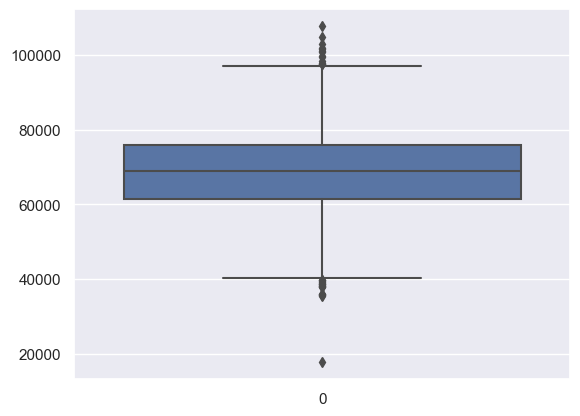

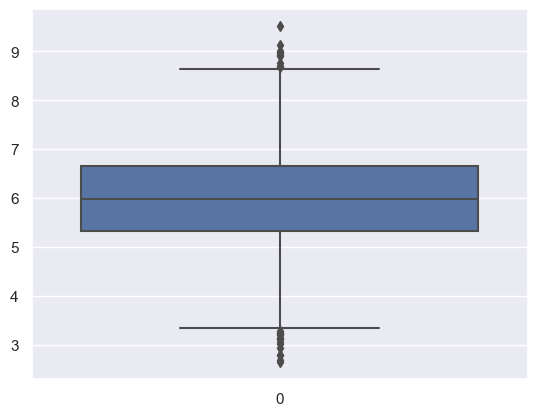

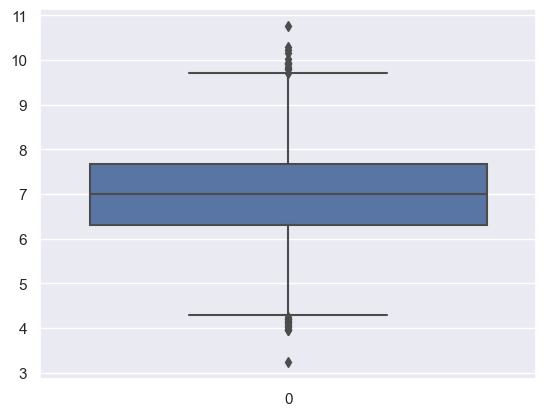

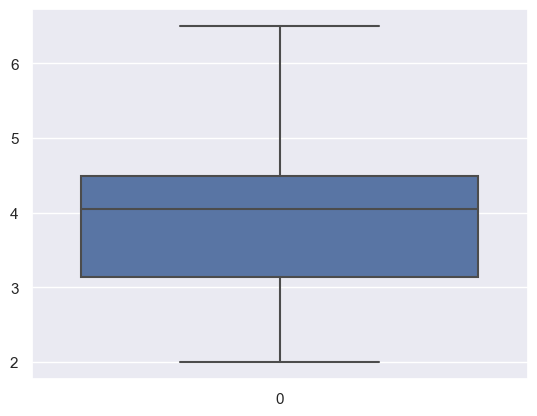

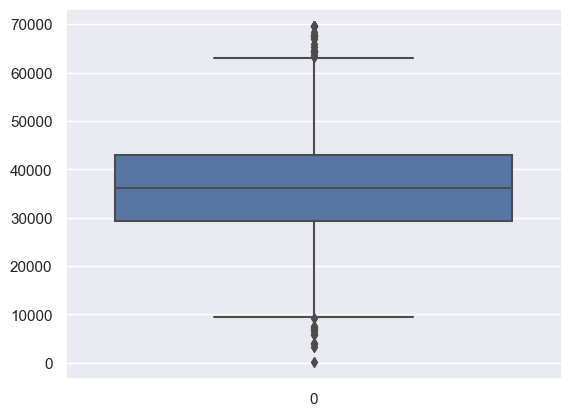

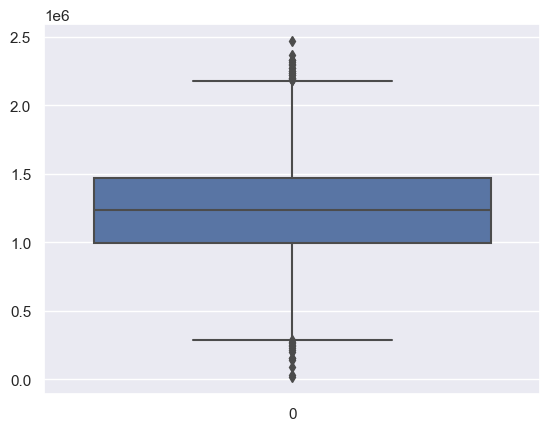

In [13]:
def outliers_detection(col):
    
    sns.boxplot(df[col])
    plt.show()
    
    
for i in list(df.select_dtypes(exclude = ['object']).columns)[0:]:
    
    outliers_detection(i)

###### Insights : Outliers are contain features like Avg. Area Income,Avg. Area House Age , Avg. Area Number of Rooms , Area Population

In [14]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [15]:
df.isnull().sum()

Avg. Area Income                10
Avg. Area House Age              0
Avg. Area Number of Rooms        5
Avg. Area Number of Bedrooms     6
Area Population                  0
Price                            0
Address                          0
dtype: int64

##### Avg. Area Income  and  Avg. Area Number of Rooms having outliers are there so we impute missing values by median  and Avg. Area Number of Bedrooms feature does not contains outliers so impute it by mean. 

###### Avg. Area Income

In [16]:
df['Avg. Area Income'].median()

68797.67188499999

In [17]:
df['Avg. Area Income'].fillna(df['Avg. Area Income'].median() , inplace = True)

##### Avg. Area Number of Rooms

In [18]:
df['Avg. Area Number of Rooms'].median()

7.0029397

In [19]:
df['Avg. Area Number of Rooms'].fillna(df['Avg. Area Number of Rooms'].median() , inplace = True)

###### Avg. Area Number of Bedrooms

In [20]:
df['Avg. Area Number of Bedrooms'].mean()

3.981874249098918

In [21]:
df['Avg. Area Number of Bedrooms'].fillna(df['Avg. Area Number of Bedrooms'].mean() , inplace = True)

##### Check Imputation Done or not

In [22]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

##### Handling Missing values are done

### 2. Handling the characters(encode)

In [23]:
df['Address'] = df['Address'].astype('category')

In [24]:
df['Address'] = df['Address'].cat.codes

In [25]:
df['Address'].head(2)

0    962
1    863
Name: Address, dtype: int16

#### Check Address variable is significant or not by annova test

In [26]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [27]:
model = ols('Price ~ Address' , data = df).fit()
annova_value = sm.stats.anova_lm(model , typ= 2)
print(annova_value)

                sum_sq      df         F    PR(>F)
Address   4.729103e+10     1.0  0.379215  0.538051
Residual  6.232883e+14  4998.0       NaN       NaN


##### Insights : Address variable is not significant with dependent variable. because its p value greater than 0.05.so we dropped it

###### Here we have only one character variable is Address . which is not significant . because we have another variable give inforamtion of area. feature are giving info of area like Avg. Area Income , Avg. Area House Age , Avg. Area Number of Rooms , Avg. Area Number of Bedrooms , Area Population

In [28]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [29]:
df.drop('Address' , axis = 1 , inplace = True)

In [30]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

#### Here we already get data in numerical format . so no need to encoding techniques

### 3. Handling Outliers

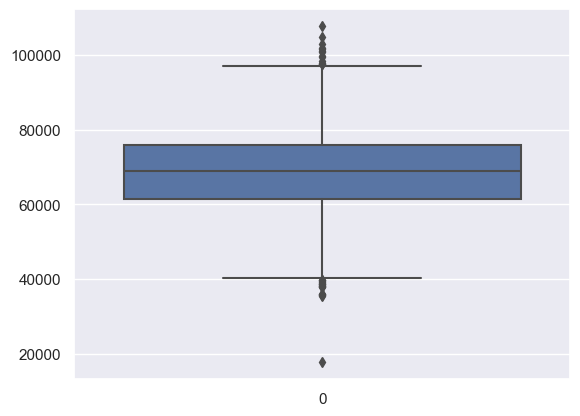

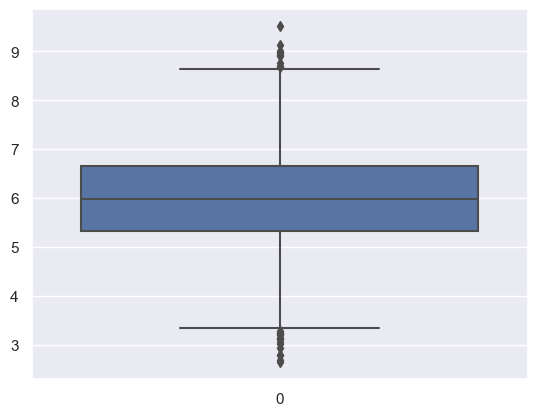

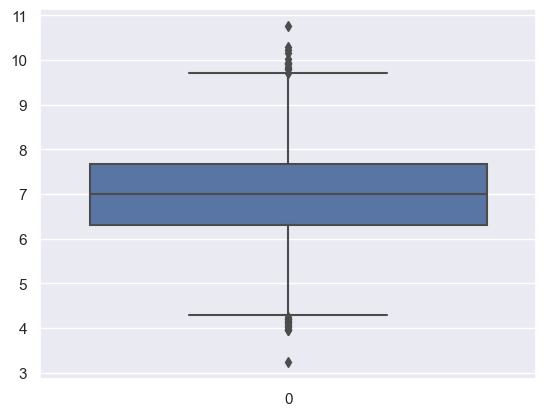

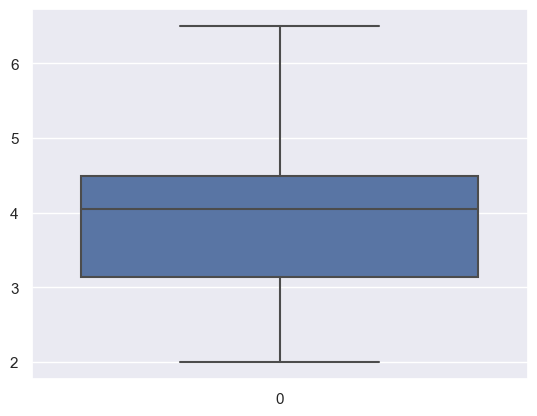

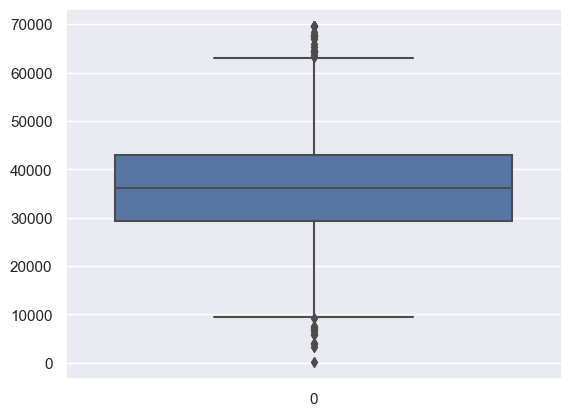

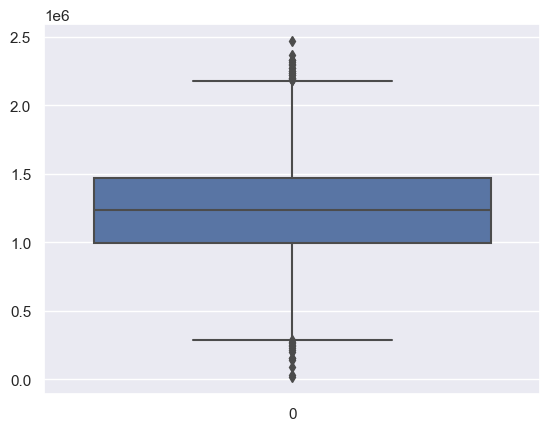

In [31]:
def boxplots(col):
    
    sns.boxplot(df[col])
    plt.show()
    
    
for i in list(df.select_dtypes(exclude = 'object').columns)[:]:
    boxplots(i)

##### Insights : Outliers are contain features like Avg. Area Income,Avg. Area House Age , Avg. Area Number of Rooms , Area Population

#### Here we handle the outliers by IQR Method

##### calculate quartiles  of outliers of Avg. Area Income

In [32]:
Q1_income = df['Avg. Area Income'].quantile(0.25)
Q2_income = df['Avg. Area Income'].quantile(0.50)
Q3_income = df['Avg. Area Income'].quantile(0.75)

IQR_income = Q3_income - Q1_income

upper_limit_income = Q3_income + (1.5 * IQR_income)
lower_limit_income = Q1_income - (1.5 * IQR_income)

print('Q1_income :' , Q1_income)
print('Q2_income :' , Q2_income)
print('Q3_income :' , Q3_income)

print('IQR_income :' , IQR_income)

print('Upper limit income :' , upper_limit_income)
print('Lower limit income :' , lower_limit_income)

Q1_income : 61485.1501925
Q2_income : 68797.67188499999
Q3_income : 75766.51910250001
IQR_income : 14281.368910000012
Upper limit income : 97188.57246750002
Lower limit income : 40063.096827499976


In [33]:
df['Avg. Area Income'].describe()

count      5000.000000
mean      68585.145895
std       10640.538021
min       17796.631190
25%       61485.150192
50%       68797.671885
75%       75766.519103
max      107701.748400
Name: Avg. Area Income, dtype: float64

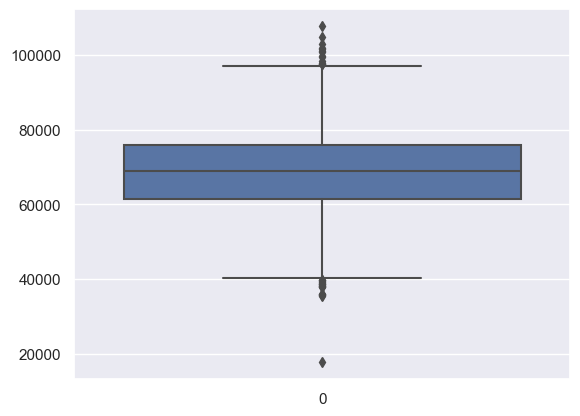

In [34]:
sns.boxplot(df['Avg. Area Income'])
plt.show()

##### Handling the outliers of Avg. Area House Age 

In [35]:
df['Avg. Area Income'] = np.where(df['Avg. Area Income'] > upper_limit_income , upper_limit_income,
        np.where(df['Avg. Area Income'] < lower_limit_income , lower_limit_income , df['Avg. Area Income']))

#####  Avg. Area Income  after treatment of outliers

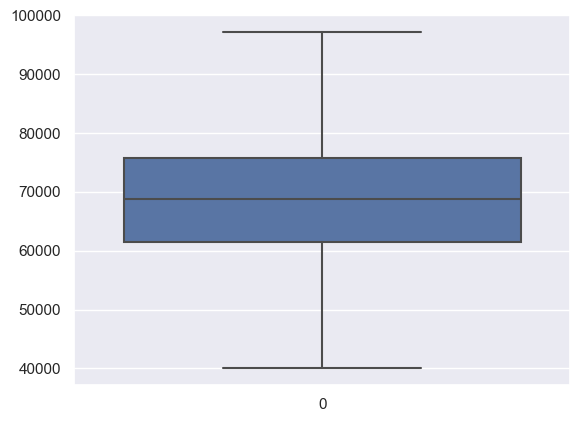

In [36]:
sns.boxplot(df['Avg. Area Income'])
plt.show()

In [37]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

#### Calculate quartile value of Avg. Area House Age

In [38]:
Q1_age = df['Avg. Area House Age'].quantile(0.25)
Q2_age = df['Avg. Area House Age'].quantile(0.50)
Q3_age = df['Avg. Area House Age'].quantile(0.75)


IQR_age = Q3_age - Q1_age

upper_limit_age = Q3_age + (1.5 * IQR_age)
lower_limit_age = Q1_age - (1.5 * IQR_age)

print('Q1_age :' , Q1_age)
print('Q2_age :' , Q2_age)
print('Q3_age :' , Q3_age)
print('IQR_age :' , IQR_age)
print('upper limit age :' , upper_limit_age)
print('lower limit age :' , lower_limit_age)

Q1_age : 5.32228301575
Q2_age : 5.970428947
Q3_age : 6.65080847925
IQR_age : 1.3285254635000001
upper limit age : 8.6435966745
lower limit age : 3.3294948205


In [39]:
df['Avg. Area House Age'].describe()

count    5000.000000
mean        5.977222
std         0.991456
min         2.644304
25%         5.322283
50%         5.970429
75%         6.650808
max         9.519088
Name: Avg. Area House Age, dtype: float64

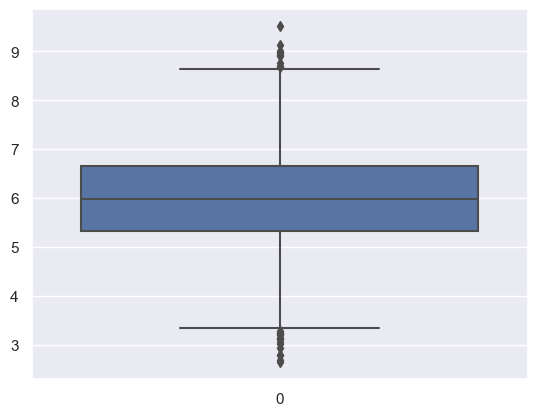

In [40]:
sns.boxplot(df['Avg. Area House Age'])
plt.show()

#### Capping the Avg. Area House Age by upper limit and lower limit 

In [41]:
df['Avg. Area House Age'] = np.where(df['Avg. Area House Age'] > upper_limit_age , upper_limit_age , 
        np.where(df['Avg. Area House Age'] < lower_limit_age , lower_limit_age , df['Avg. Area House Age']))

#### Avg. Area House Age After the treatment of outliers

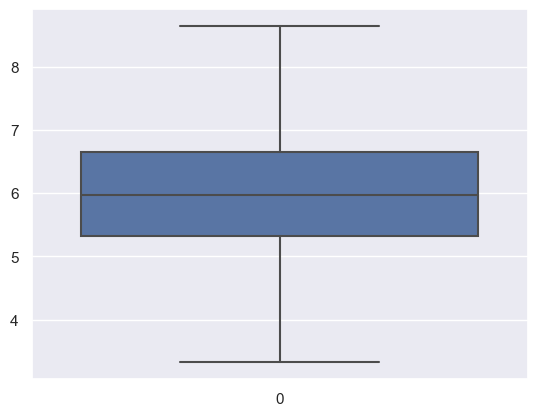

In [42]:
sns.boxplot(df['Avg. Area House Age'])
plt.show()

In [43]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

##### Calculate quartile value of Avg. Area Number of Rooms

In [44]:
Q1_rooms = df['Avg. Area Number of Rooms'].quantile(0.25)
Q2_rooms = df['Avg. Area Number of Rooms'].quantile(0.50)
Q3_rooms = df['Avg. Area Number of Rooms'].quantile(0.75)

IQR_rooms = Q3_rooms - Q1_rooms

upper_limit_rooms = Q3_rooms + (1.5 * IQR_rooms)
lower_limit_rooms = Q1_rooms - (1.5 * IQR_rooms)

print('Q1_rooms :' , Q1_rooms)
print('Q2_rooms :' , Q2_rooms)
print('Q3_rooms :' , Q3_rooms)
print('IQR_rooms :' , IQR_rooms)
print('upper limit rooms :' , upper_limit_rooms)
print('lower limit rooms :' , lower_limit_rooms)

Q1_rooms : 6.29969161825
Q2_rooms : 7.0029397
Q3_rooms : 7.6652805545
IQR_rooms : 1.36558893625
upper limit rooms : 9.713663958875
lower limit rooms : 4.251308213874999


In [45]:
df['Avg. Area Number of Rooms'].describe()

count    5000.000000
mean        6.987708
std         1.005435
min         3.236194
25%         6.299692
50%         7.002940
75%         7.665281
max        10.759588
Name: Avg. Area Number of Rooms, dtype: float64

<Axes: >

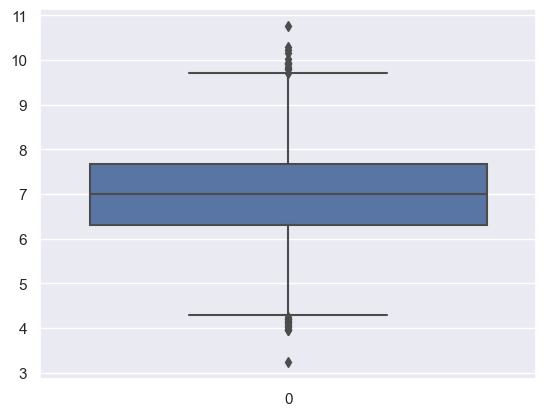

In [46]:
sns.boxplot(df['Avg. Area Number of Rooms'])

##### Capping the outliers of Avg. Area Number of Rooms by upper limit and lower limit

In [47]:
df['Avg. Area Number of Rooms'] = np.where(df['Avg. Area Number of Rooms'] > upper_limit_rooms , upper_limit_rooms ,
        np.where(df['Avg. Area Number of Rooms'] < lower_limit_rooms , lower_limit_rooms , df['Avg. Area Number of Rooms']))

#### Avg. Area Number of Rooms  After treating outliers

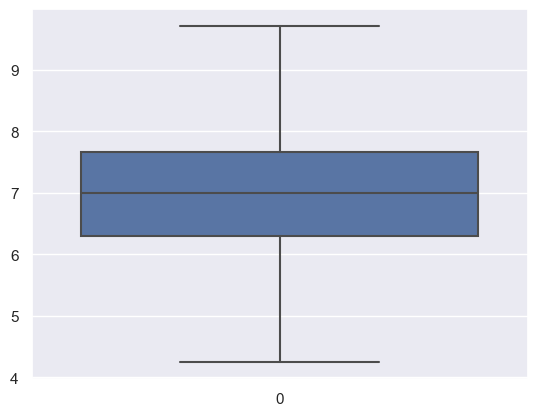

In [48]:
sns.boxplot(df['Avg. Area Number of Rooms'])
plt.show()

In [49]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

##### Calculate quartiles value of Area Population

In [50]:
Q1_pop = df['Area Population'].quantile(0.25)
Q2_pop = df['Area Population'].quantile(0.50)
Q3_pop = df['Area Population'].quantile(0.75)

IQR_pop = Q3_pop - Q1_pop

upper_limit_pop = Q3_pop + (1.5 * IQR_pop)
lower_limit_pop = Q1_pop - (1.5 * IQR_pop)

print('Q1_pop :' , Q1_pop)
print('Q2_pop :' , Q2_pop)
print('Q3_pop :' , Q3_pop)
print('Upper limit pop :' , upper_limit_pop)
print('Lower limit pop :' , lower_limit_pop)

Q1_pop : 29403.9287
Q2_pop : 36199.40669
Q3_pop : 42861.29077
Upper limit pop : 63047.333875
Lower limit pop : 9217.885595000003


In [51]:
df['Area Population'].describe()

count     5000.000000
mean     36163.516039
std       9925.650114
min        172.610686
25%      29403.928700
50%      36199.406690
75%      42861.290770
max      69621.713380
Name: Area Population, dtype: float64

<Axes: >

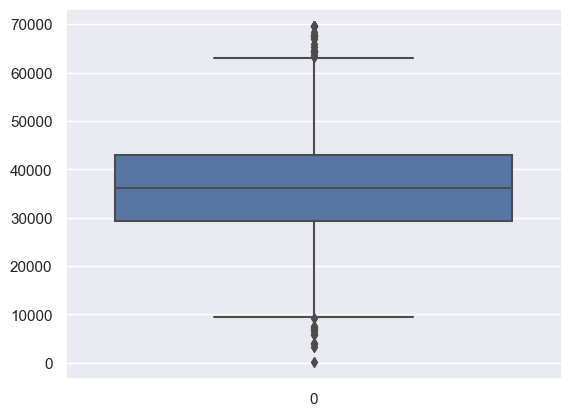

In [52]:
sns.boxplot(df['Area Population'])

#### Capping Area Population by upper limit and lower limit

In [53]:
df['Area Population'] = np.where(df['Area Population'] > upper_limit_pop , upper_limit_pop ,
        np.where(df['Area Population'] < lower_limit_pop , lower_limit_pop , df['Area Population']))

#### Area Population After treating outliers

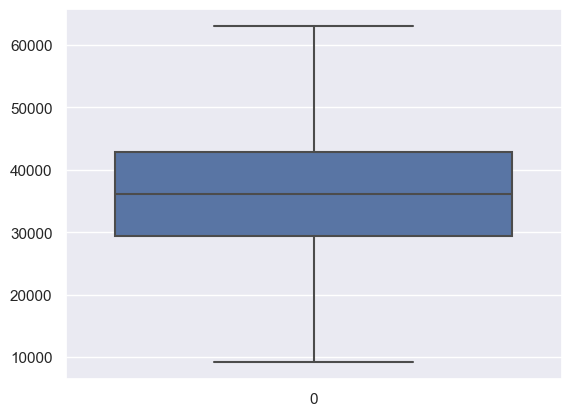

In [54]:
sns.boxplot(df['Area Population'])
plt.show()

#### After the treating outliers

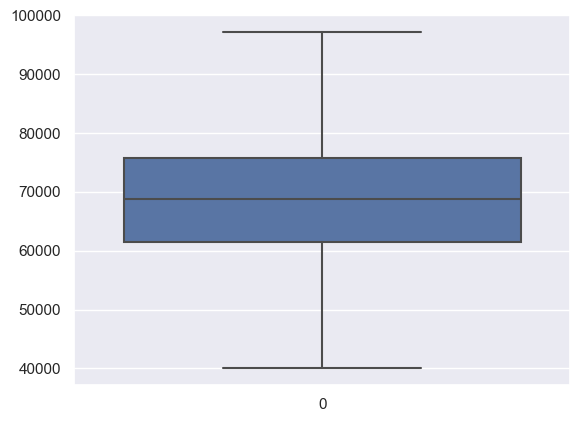

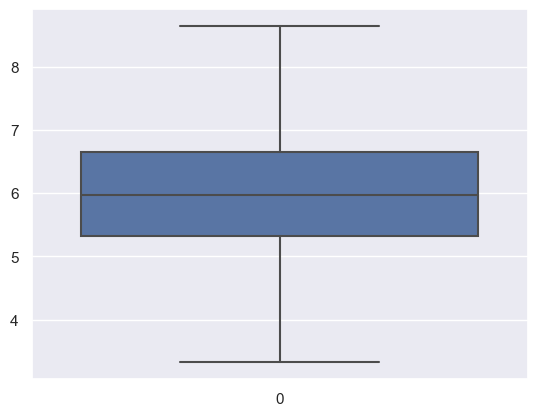

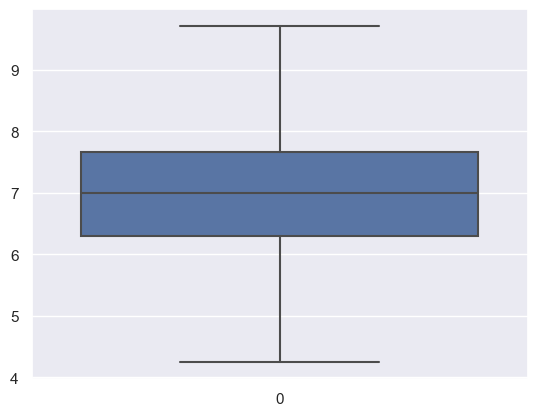

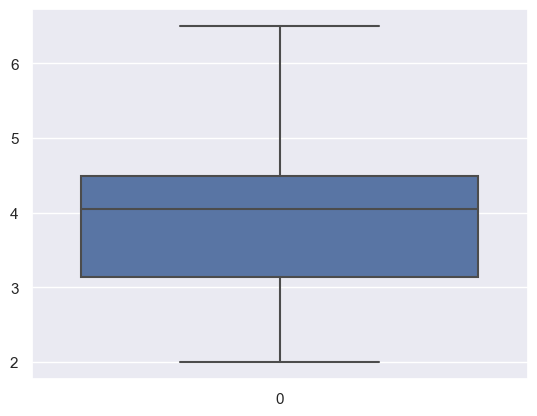

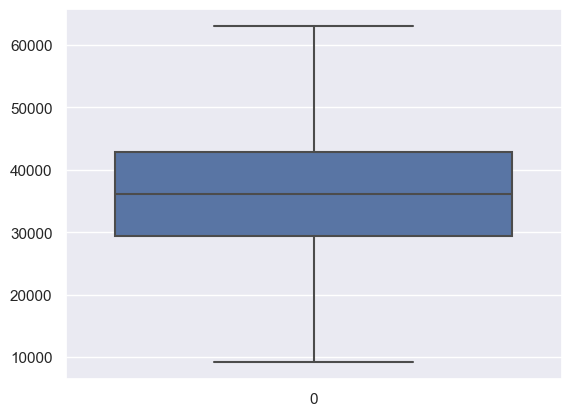

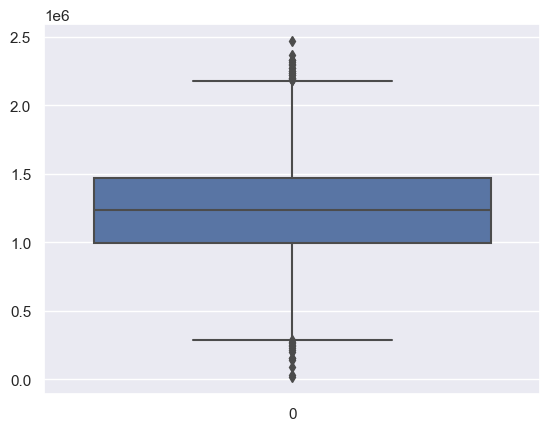

In [55]:
def boxplots(col):
    
    sns.boxplot(df[col])
    plt.show()
    
    
for i in list(df.select_dtypes(exclude = 'object').columns)[:]:
    boxplots(i)

#### Insights : Last variable is price . Its dependent variable so we not touch it

### 4. Feature Scaling

##### Here we go with Standardization . because when we dont know about the data and we had lots of outliers but we treat them earlier and industry follows by default approach for feature scale is standardscaler

#### Split data into independent and dependent variable

In [56]:
df.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1059033.558
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1505890.915


In [57]:
x = df.iloc[: , :-1]
y = df.iloc[: , -1]

In [58]:
x.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217


In [59]:
y.head(2)

0    1059033.558
1    1505890.915
Name: Price, dtype: float64

#### StandardScaler

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()

In [62]:
scaled_x = scaler.fit_transform(x)

In [63]:
scaled_x = pd.DataFrame(scaled_x)

In [64]:
scaled_x

,0,1,2,3,4
0,1.036382,-0.298541,0.021620,0.087648,-1.325622
1,1.008309,0.025747,-0.256381,-0.722966,0.407049
2,-0.690457,-0.113082,1.523179,0.930687,0.073326
3,-0.495800,1.226822,-1.398967,-0.585161,-0.187484
4,-0.813869,-0.949376,0.850726,0.201134,-0.994293
...,...,...,...,...,...
4995,-0.758470,1.877474,-0.849064,-0.423039,-1.350917
4996,0.936679,1.035210,-0.410236,0.030905,-1.069131
4997,-0.491501,1.290004,-2.179585,-1.501155,-0.293363
4998,-0.055437,-0.448985,0.142416,1.181977,0.655755


### Check multicollinearity issue by variance Inflation factor in multiple linear regression

In [65]:
scaled_x.shape

(5000, 5)

In [66]:
variable = scaled_x

In [67]:
variable.shape

(5000, 5)

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
vif = pd.DataFrame()

In [70]:
vif

""


In [71]:
vif['variance_inflation_factor'] = [variance_inflation_factor(variable , i) for i in range(variable.shape[1])]

In [72]:
vif['features'] = df.columns[:-1]

In [73]:
vif

,variance_inflation_factor,features
0,1.001066,Avg. Area Income
1,1.000593,Avg. Area House Age
2,1.274838,Avg. Area Number of Rooms
3,1.275700,Avg. Area Number of Bedrooms
4,1.001142,Area Population


#### Insights : All values are less than 5 so there is no multicollinearity 

### Correlation

In [74]:
df.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1059033.558
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1505890.915


In [75]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002622,-0.011009,0.019124,-0.014299,0.638812
Avg. Area House Age,-0.002622,1.000000,-0.009577,0.007134,-0.018191,0.452445
Avg. Area Number of Rooms,-0.011009,-0.009577,1.000000,0.463594,0.000482,0.334657
Avg. Area Number of Bedrooms,0.019124,0.007134,0.463594,1.000000,-0.022105,0.171294
Area Population,-0.014299,-0.018191,0.000482,-0.022105,1.000000,0.408805
Price,0.638812,0.452445,0.334657,0.171294,0.408805,1.000000


##### Visualize correlation by Heatmap

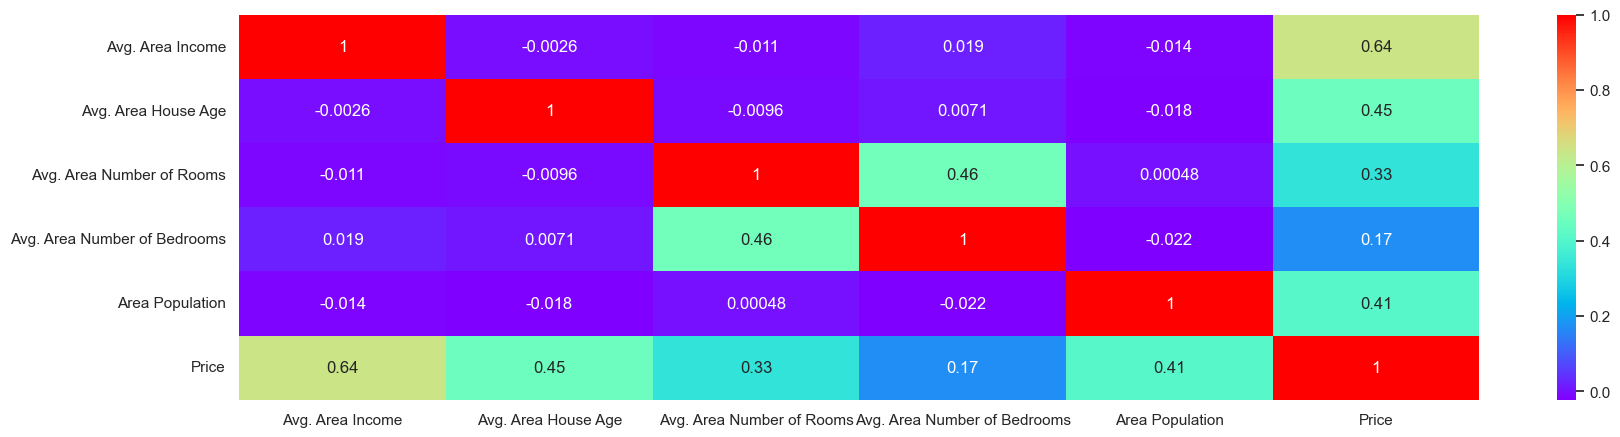

In [76]:
plt.figure(figsize = (20,5))
sns.heatmap(df.corr() , annot = True , cbar = True , cmap = 'rainbow')
plt.show()

#### Insights : we have to check correlation of independent variable with respect to dependent variable only.
####            so here we check with price (dependent variable) only. 
####             price with Avg.Area Income is 0.64 that is strong positive correlation
####            price with Avg.Area House Ageis 0.45 that is weak postive correlation
####            price with Avg.Area Number of Rooms is 0.33 that is weak positive correlation
####            price with Avg.Area Number of Bedrooms is 0.17 that is No correlation
####            price with Area Population that is  0.41 that is weak positive correlation

##### Insights : From heamap also we get to know . we don't have multicollinearity

#### Split the data into train test. where train data is use for training model or building the model and test data is use for to predict and evaluation of model

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25 , random_state = 12)

In [79]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(3750, 5) (1250, 5) (3750,) (1250,)


### Build Linear regression Model

### Approach No : 1 - Basic Method

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
regression = LinearRegression()

### Build Training model

In [82]:
regression.fit(x_train , y_train)

LinearRegression()

##### Slope / coefficient

In [83]:
regression.coef_

array([2.18098127e+01, 1.65309051e+05, 1.20792551e+05, 1.63208599e+03,
       1.51147413e+01])

##### Intercept

In [84]:
regression.intercept_

-2649598.346131988

##### Predict the price of training model

In [85]:
y_pred_train = regression.predict(x_train)

In [86]:
y_pred_train

array([1714476.30961784, 2215479.46659248, 1310132.09257958, ...,
       1785035.60466659,  811627.27605141,  862999.16476467])

##### Calculate Accuracy of training model

In [87]:
from sklearn.metrics import r2_score

In [88]:
training_accuracy_lm = r2_score(y_pred_train , y_train)

In [89]:
training_accuracy_lm

0.9096452824940296

##### Accuracy of training model is 90.8909906930113 %

### Building testing model

##### Slope / Coefficient of test model

In [90]:
regression.coef_

array([2.18098127e+01, 1.65309051e+05, 1.20792551e+05, 1.63208599e+03,
       1.51147413e+01])

##### Intercept of testing model

In [91]:
regression.intercept_

-2649598.346131988

#### predict price of testing model

In [92]:
y_pred_test = regression.predict(x_test)

In [93]:
y_pred_test

array([1554486.40114637, 1416861.9533365 ,  975363.75682161, ...,
       1347255.23328945, 1122642.93321627, 1320220.49254815])

##### calculate accuracy of testing model

In [94]:
testing_accuracy_lm = r2_score(y_pred_test , y_test)

In [95]:
testing_accuracy_lm

0.901795665763183

##### Accuracy of testing model is 90.57325482642149 % 

### From analyasing of training accuracy 90.8909906930113 %  and testing accuracy 90.57325482642149 %
### We get to know our model get Most Generalise Model. Means there is no overfitting and no underfitting

### Approach No : 2 : Ordinary Least Square

#### When you solve linear regression model then always go with OLS method

In [96]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [97]:
reg_model = smf.OLS(endog = y_train , exog = x_train).fit()

In [98]:
reg_model

In [99]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          1.992e+04
Date:                Fri, 16 Feb 2024   Prob (F-statistic):                        0.00
Time:                        15:43:42   Log-Likelihood:                         -51845.
No. Observations:                3750   AIC:                                  1.037e+05
Df Residuals:                    3745   BIC:                                  1.037e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                10.1279      0.315     32.103      0.000       9.509      10.746
Avg. Area House Age           5.114e+04   3483.159     14.682      0.000    4.43e+04     5.8e+04
Avg. Area Number of Rooms    -7854.9937   3842.549     -2.044      0.041   -1.54e+04    -321.300
Avg. Area Number of Bedrooms  4938.8808   3650.892      1.353      0.176   -2219.049    1.21e+04
Area Population                  7.9445      0.387     20.514      0.000       7.185       8.704
==============================================================================
Omnibus:                        0.971   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.615   Jarque-Bera (JB):                1.001
Skew:                           0.003   Prob(JB):                        0.606
Kurtosis:                       2.920   Cond. No.                     9.34e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Insights :  Here we get probability value of bedroom is 0.175. 
####             that means greater than 0.05 .
####             Here we clearly say bedroom variable is not significant to price(dependent) variable                                on basis of p value
####             so we can drop it by backword elimination .

###### Drop Avg. Area Number of Bedrooms

In [100]:
x.drop('Avg. Area Number of Bedrooms' , axis = 1 , inplace = True)

In [101]:
x.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,79545.45857,5.682861,7.009188,23086.80050
1,79248.64245,6.002900,6.730821,40173.07217


##### Again we train test split

In [102]:
x_train_ , x_test_ , y_train_ , y_test_ = train_test_split(x , y , test_size = 0.25 , random_state = 12)

In [103]:
print(x_train_.shape , x_test_.shape , y_train_.shape , y_test_.shape)

(3750, 4) (1250, 4) (3750,) (1250,)


#### Again we check with OLS

In [104]:
reg_model = smf.OLS(endog = y_train_ , exog = x_train_).fit()

In [105]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          2.489e+04
Date:                Fri, 16 Feb 2024   Prob (F-statistic):                        0.00
Time:                        15:43:42   Log-Likelihood:                         -51846.
No. Observations:                3750   AIC:                                  1.037e+05
Df Residuals:                    3746   BIC:                                  1.037e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Avg. Area Income             10.1318      0.315     32.113      0.000       9.513      10.750
Avg. Area House Age        5.121e+04   3483.152     14.702      0.000    4.44e+04     5.8e+04
Avg. Area Number of Rooms -5059.6756   3240.024     -1.562      0.118   -1.14e+04    1292.707
Area Population               7.9287      0.387     20.480      0.000       7.170       8.688
==============================================================================
Omnibus:                        1.164   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.559   Jarque-Bera (JB):                1.179
Skew:                           0.002   Prob(JB):                        0.554
Kurtosis:                       2.913   Cond. No.                     7.88e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Insights : Here we again get autocrrelation .
#####            Avg. Area Number of Rooms has value greater than 0.05
#####            so we need to make as No autocrelation.so we droping it

In [106]:
x.drop(columns = 'Avg. Area Number of Rooms' , axis =1 , inplace = True)

In [107]:
x.head(2)

,Avg. Area Income,Avg. Area House Age,Area Population
0,79545.45857,5.682861,23086.80050
1,79248.64245,6.002900,40173.07217


##### Again we check we get No autocrrelation or not 

In [108]:
x_train__ , x_test__ , y_train__ , y_test__ = train_test_split(x , y , test_size = 0.25 , random_state = 12 )

In [109]:
print(x_train__.shape , x_test__.shape , y_train__.shape , y_test__.shape)

(3750, 3) (1250, 3) (3750,) (1250,)


In [110]:
ols_model = smf.OLS(endog = y_train__ , exog = x_train__).fit()

In [111]:
ols_model

In [112]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          3.317e+04
Date:                Fri, 16 Feb 2024   Prob (F-statistic):                        0.00
Time:                        15:43:43   Log-Likelihood:                         -51848.
No. Observations:                3750   AIC:                                  1.037e+05
Df Residuals:                    3747   BIC:                                  1.037e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Avg. Area Income        9.9044      0.280     35.379      0.000       9.356      10.453
Avg. Area House Age  4.888e+04   3147.546     15.529      0.000    4.27e+04     5.5e+04
Area Population         7.7772      0.375     20.747      0.000       7.042       8.512
==============================================================================
Omnibus:                        1.235   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.539   Jarque-Bera (JB):                1.244
Skew:                           0.001   Prob(JB):                        0.537
Kurtosis:                       2.911   Cond. No.                     6.16e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Insights : Now we get exact No autocorelation

### We need to check this parameters before handover or before deployement

##### Parametric Test : 


   ###### 1. Accuracy : Adj. R-squared (uncentered): 0.964
   ###### 2. p-value - all variable are statically significant (p<=0.05)
   
   
   
    
  ##### Assumptions :
     
   ###### 1. Multicollinearity - Not found - satisfied
   ###### 2. Endogenity - selected right dependent variable - satisfied
   ###### 3. Hetroscedasticity - already handled outlier (hence, data is homoscadasticity)
   ###### 4. Autocorrelation - Durbin-Watson: 1.979 (p-value <=0.05) - satisfied (no autocorrelation found)
   ###### 5. Check Linearity - satisfied
   ###### 6. Normality of Residual - satisfied

### check Linearity

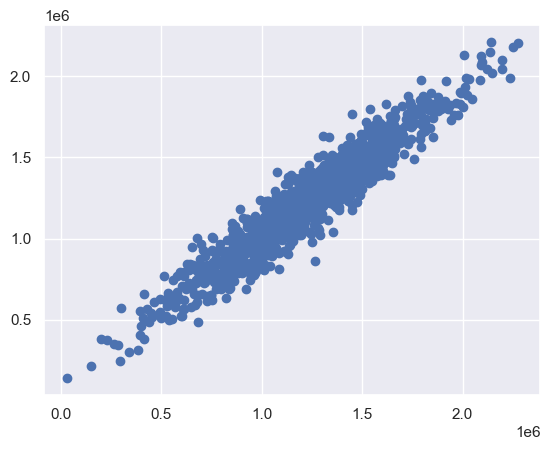

In [113]:
plt.scatter(x = y_test , y = y_pred_test)
plt.show()

### This three plots to check normality of residual
#### Normality of residual : residual should be in normal distribution
##### Residual Error :(y_test - y_pred_test)

### Distplot

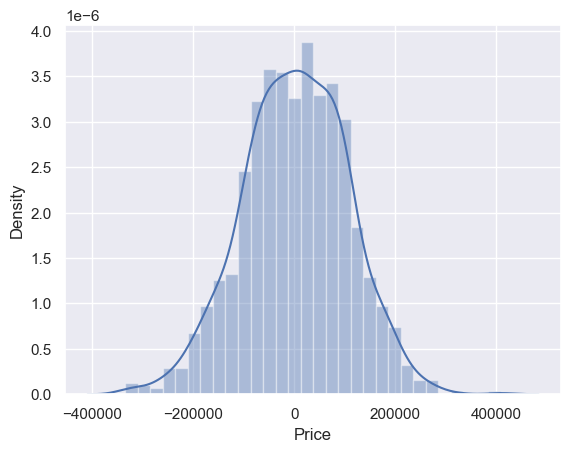

In [114]:
sns.distplot((y_test - y_pred_test) , bins = 30)
plt.show()

### Histplot

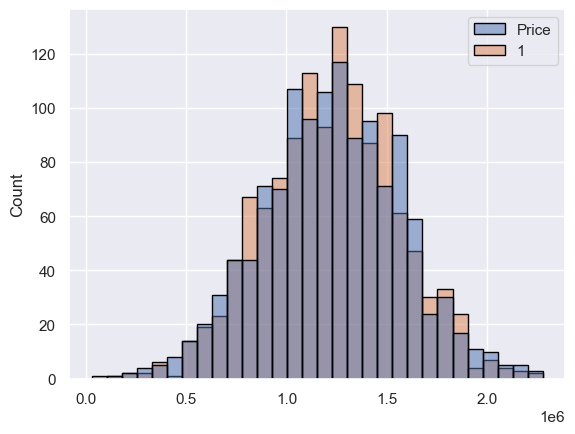

In [115]:
sns.histplot((y_test , y_pred_test) , bins = 30 , edgecolor = 'black')
plt.show()

### KDEplot

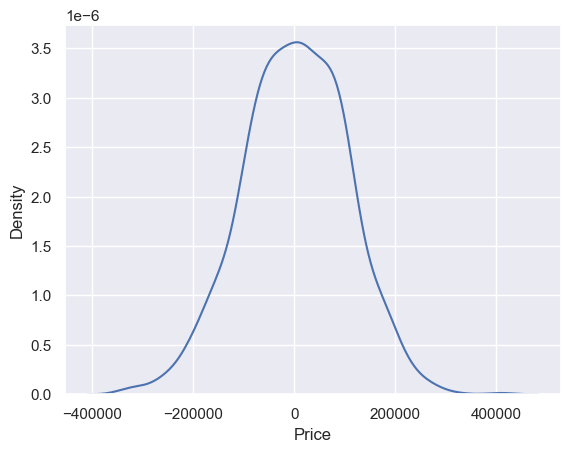

In [116]:
sns.kdeplot( (y_test - y_pred_test))
plt.show()

###### cross check our model get predicted correct results or not by regulariztion or if we get different results then go with regularization . because it not make any variance because its slope value closure to zero

## Regularization Techniques

###### 1. Lasso Regularization (L1):

###### Lasso make slope value exact zero or closure to zero

In [117]:
from sklearn.linear_model import Lasso

In [118]:
lasso = Lasso(alpha = 0.1)

In [119]:
df.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1059033.558
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1505890.915


In [120]:
x = df.iloc[: , :-1]
y = df.iloc[: , -1]

In [121]:
x.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217


In [122]:
y.head(2)

0    1059033.558
1    1505890.915
Name: Price, dtype: float64

In [123]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25 , random_state = 12)

In [124]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(3750, 5) (1250, 5) (3750,) (1250,)


###### Training model by lasso

In [125]:
lasso.fit(x_train , y_train)

Lasso(alpha=0.1)

##### slope by lasso

In [126]:
lasso.coef_

array([2.18098127e+01, 1.65308950e+05, 1.20792473e+05, 1.63205235e+03,
       1.51147412e+01])

##### slope by regression

In [127]:
regression.fit(x_train , y_train)

LinearRegression()

In [128]:
regression.coef_

array([2.18098127e+01, 1.65309051e+05, 1.20792551e+05, 1.63208599e+03,
       1.51147413e+01])

#### Insights  : No need to regularization here because our linear regression(approach 1) give exact results that regularization give

###### Prediction on training data by lasso

In [129]:
y_train_pred_lasso = lasso.predict(x_train)

In [130]:
y_train_pred_lasso

array([1714476.24556868, 2215479.02461354, 1310131.95654099, ...,
       1785035.40314047,  811627.19653936,  862999.11781173])

##### Lasso train accuracy

In [131]:
training_accuracy_lasso = r2_score(y_train , y_train_pred_lasso)

In [132]:
training_accuracy_lasso

0.9171327311603563

###### Building test model by lasso

In [133]:
lasso.fit(x_test , y_test)

Lasso(alpha=0.1)

###### Prediction of Lasso on test data

In [134]:
y_test_predict_lasso = lasso.predict(x_test)

In [135]:
y_test_predict_lasso

array([1563779.14205704, 1419253.7847576 ,  965292.54278024, ...,
       1347523.67759434, 1115126.57378595, 1333266.1768816 ])

###### Accuracy of lasso on test data

In [136]:
testing_accuracy_lasso = r2_score(y_test , y_test_predict_lasso)

In [137]:
testing_accuracy_lasso

0.9123046759556822

#### Accuracy of linear regression model to cross check correct or not

In [138]:
regression.fit(x_test , y_test)

LinearRegression()

In [139]:
y_test_pred = regression.predict(x_test)

In [140]:
testing_accuracy_lm = r2_score(y_test , y_test_pred)

###### There is no diffrence in accuarcies also thats why no need to regularization here

In [141]:
training_accuracy_lm

0.9096452824940296

In [142]:
training_accuracy_lasso

0.9171327311603563

In [143]:
testing_accuracy_lm

0.9123046759558817

In [144]:
testing_accuracy_lasso

0.9123046759556822

##### Insights : Here slope does not make any impact on dependent variable. because both linear and lasso get same results. if is thereslope make any impact then your linear and lasso get diffrent results.

### Ridge Regularization(L2)

In [145]:
from sklearn.linear_model import Ridge

In [146]:
ridge = Ridge(alpha = 0.1)

##### Training model by ridge

In [147]:
ridge.fit(x_train , y_train)

Ridge(alpha=0.1)

##### prediction of ridge

In [148]:
y_train_pred_ridge = ridge.predict(x_train)

In [149]:
y_train_pred_ridge

array([1714474.10314529, 2215465.86565826, 1310133.27518572, ...,
       1785021.59369078,  811630.3884559 ,  863001.31924347])

#### Accurracy of training ridge

In [150]:
training_accuracy_ridge = r2_score(y_train , y_train_pred_ridge)

In [151]:
training_accuracy_ridge

0.9171327308987074

##### Test model by ridge

In [152]:
ridge.fit(x_test , y_test)

Ridge(alpha=0.1)

##### prediction by ridge on test data

In [153]:
y_test_pred_ridge = ridge.predict(x_test)

In [154]:
y_test_pred_ridge

array([1563756.2138382 , 1419240.71346524,  965308.82276087, ...,
       1347532.75549244, 1115140.34531261, 1333258.42899989])

##### Acuuracy of ridge on test data

In [155]:
testing_accuracy_ridge = r2_score(y_test , y_test_pred_ridge )

In [156]:
testing_accuracy_ridge

0.9123046731874855

#### Evaluate linear model results with ridge

In [157]:
training_accuracy_lm

0.9096452824940296

In [158]:
training_accuracy_ridge

0.9171327308987074

In [159]:
testing_accuracy_lm

0.9123046759558817

In [160]:
testing_accuracy_ridge

0.9123046731874855

##### Insights : Our Linear regression model become most generalised or most accurate model because our training  accuracy is 90.89 % and testing accuracy is 91.91 %. so diffrence of train and test accuracy is 1.02 % . i.e. our variance . if variance of train and test accuracy is less than 10 %. Then model is most generalise or most accurate

##### No need to make regularization

##### Insights : Here slope does not make any impact on dependent variable. because both linear and ridge get same results. if is there slope make any impact then your linear and ridge get different results.

### ElasticNet Regularization(L3): combination of L1 and L2

In [161]:
from sklearn.linear_model import ElasticNet

In [162]:
elasticnet = ElasticNet(alpha = 0.1 , l1_ratio = 0.1)

#### Build training model by elasticnet

In [163]:
elasticnet.fit(x_train , y_train)

ElasticNet(alpha=0.1, l1_ratio=0.1)

##### Prediction on training data by elasticnet

In [164]:
y_train_pred_elastic = elasticnet.predict(x_train)

In [165]:
y_train_pred_elastic

array([1707460.12406038, 2173371.46940824, 1312852.37237471, ...,
       1742431.39398945,  820667.83510524,  869089.49799821])

#### Acuuracy of training data of elasticnet

In [166]:
training_accuracy_elasticnet = r2_score(y_train , y_train_pred_elastic)

In [167]:
training_accuracy_elasticnet

0.91469771292229

##### Testing model by elasticnet

In [168]:
elasticnet.fit(x_test , y_test)

ElasticNet(alpha=0.1, l1_ratio=0.1)

##### prediction on test data by elasticnet

In [169]:
y_test_pred_elastic = elasticnet.predict(x_test)

In [170]:
y_test_pred_elastic

array([1540490.71555964, 1405640.09313081,  982592.07369603, ...,
       1355984.32183572, 1129012.14114606, 1325680.72094165])

##### Accuracy of test data on elasticnet

In [171]:
testing_accuracy_elasticnet = r2_score(y_test , y_test_pred_elastic)

In [172]:
testing_accuracy_elasticnet

0.9094792975723188

###### cross validation of linear regression model with elasticnet model

In [173]:
training_accuracy_lm

0.9096452824940296

In [174]:
training_accuracy_elasticnet

0.91469771292229

In [175]:
testing_accuracy_lm

0.9123046759558817

In [176]:
testing_accuracy_elasticnet

0.9094792975723188

###### Insights : Our Linear regression model become most generalised or most accurate model because our training accuracy is 90.89 % and testing accuracy is 91.91 %. so diffrence of train and test accuracy is 1.02 % . i.e. our variance . if variance of train and test accuracy is less than 10 %. Then model is most generalise or most accurate
##### No need to make regularization here because we not get any high bias and high variance 
##### Insights : Here slope does not make any impact on dependent variable. because both linear and ridge get same results. if is there slope make any impact then your linear and ridge get diffrent results.¶


## Optimization Technique

##### Optimization Technique is use for to minimize error i.e increase accuracy

### Gradient Descent : It always pass scaled data

In [177]:
from sklearn.linear_model import SGDRegressor

In [178]:
gdmodel = SGDRegressor()

In [179]:
gdmodel

SGDRegressor()

###### It always take scaled Data

In [180]:
x.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217


In [181]:
y.head(2)

0    1059033.558
1    1505890.915
Name: Price, dtype: float64

In [182]:
scaled_x.head(2)

,0,1,2,3,4
0,1.036382,-0.298541,0.021620,0.087648,-1.325622
1,1.008309,0.025747,-0.256381,-0.722966,0.407049


##### train test split on scaled data becasue gradient descent take scaled data only

In [183]:
x_train_scaled , x_test_scaled , y_train_scaled , y_test_scaled = train_test_split(scaled_x , y , test_size = 0.25 , random_state = 12)

In [184]:
print(x_train_scaled.shape , x_test_scaled.shape , y_train_scaled.shape , y_test_scaled.shape)

(3750, 5) (1250, 5) (3750,) (1250,)


#### building train model of  the gradient descent model

In [185]:
gdmodel.fit(x_train_scaled , y_train_scaled)

SGDRegressor()

###### predict train data by gradient descent model

In [186]:
y_train_pred_gd = gdmodel.predict(x_train_scaled)

In [187]:
y_train_pred_gd

array([1714034.59991067, 2210475.28714321, 1309693.40270692, ...,
       1781828.50605216,  813744.66289993,  864409.13475093])

#### Accuracy of training model of gradient descent

In [188]:
training_accuracy_gd = r2_score(y_train_scaled , y_train_pred_gd)

In [189]:
training_accuracy_gd

0.9171085651177093

##### Predict of test data by gradient descent

In [190]:
y_test_pred_gd = gdmodel.predict(x_test_scaled)

In [191]:
y_test_pred_gd

array([1552407.25056351, 1416233.85734226,  976782.60424957, ...,
       1347681.14464948, 1123977.28277671, 1318338.33520785])

##### Accuracy of test model by gradient descent

In [192]:
testing_accuracy_gd = r2_score(y_test_scaled , y_test_pred_gd)

In [193]:
testing_accuracy_gd

0.9113372360634436

###### Check is there any high bias or high variance 

In [194]:
training_accuracy_lm

0.9096452824940296

In [195]:
training_accuracy_gd

0.9171085651177093

In [196]:
testing_accuracy_lm

0.9123046759558817

In [197]:
testing_accuracy_gd

0.9113372360634436

###### Insights : Our Linear regression model become most generalised or most accurate model because our training accuracy is 90.89 % and testing accuracy is 91.91 %. so diffrence of train and test accuracy is 1.02 % . i.e. our variance . if variance of train and test accuracy is less than 10 %. Then model is most generalise or most accurate
###### No need to make regularization here because we not get any high bias and high variance

###### Insights : Here slope does not make any impact on dependent variable. because both linear and ridge get same results. if is there slope make any impact then your linear and ridge get diffrent results.


### K fold Cross validation : How will ensure that your model is absolutely fine

In [198]:
from sklearn.model_selection import cross_val_score

In [199]:
training_accuracy = cross_val_score(regression , x_train , y_train , cv = 10)

#### Get 10 accuracies sue to cv value

In [200]:
training_accuracy

array([0.91940789, 0.91322653, 0.92084412, 0.90778185, 0.91949659,
       0.91276552, 0.90507351, 0.91794697, 0.91551941, 0.93188315])

###### Training accuracy with mean

In [201]:
training_accuracy.mean()

0.916394555458824

###### Training accuracy with max

In [202]:
training_accuracy.max()

0.9318831543403656

###### Performance matrix

In [203]:
from sklearn import metrics

##### Mean Absolute Error : it calculate error individual between actual output and predicted output and take average of all it 

In [204]:
metrics.mean_absolute_error( y_test , y_test_pred)

82677.00896811529

#### MAPE

In [205]:
print('MAPE:' , metrics.mean_absolute_error(y_test, y_test_pred)/y_test* 100)

MAPE: 4506    5.047145
1273    6.423856
357     7.953402
478     8.062422
356     5.425303
          ...   
2291    6.323258
4797    6.189183
4156    6.383835
3822    7.256440
4221    6.328856
Name: Price, Length: 1250, dtype: float64


##### MSE

In [206]:
metrics.mean_squared_error(y_test , y_test_pred)

10664759429.421154

##### RMSE 

In [207]:
np.sqrt(metrics.mean_squared_error(y_test , y_test_pred))

103270.32211347632

##### Here We select OLS model because it will give max accuracy as compare to other one (0.98).